# **Continous Time Models**

### **Stochastic Differential Equation**
SDE is a differential equation that includes a **stochastic (random) compononent**, typically modelled using **Wiener processes (Brownian motion).**

The **Ornstein-Uhlenbeck (OU) model** is common in finance and econometrics:

$$
\overset{.}{x}(t) = \rho x(t) + b W(t)
$$

where,
- $\rho \le 0$
- $W(t)$ is continous time Gaussian white noise with zero mean and autocorrelation function $R_{WW}(\tau) = \sigma_W^2 \delta(\tau)$. We can see that $W(t)$ is a WSS signal, therefore we can compute its power using by computing the autocorrelation function at $\tau = 0$.


## Recap

Note, autocorrelation is the relationship of a functions and a delayed copy of itself. It is the similarity between observations of a random variable as a function of the time lag between them.

$$
R_{XX}(t_1, t_2) = E[x_{t_1} x_{t_2}^*]
$$

Also, for real-valued functions, $E[x] = E[x^*]$ because the complex conjugate of x is just x.


Definition of **WSS signals**:
- Mean and variance are time-independent
- Autocovariance function depends only on the lag between $t_1$ and $t_2$.

Therefore, the autocorrelation function for WSS signals is:
$$
R_X(\tau) = E[x(t) x^*(t+\tau)]
$$


Definition of **average power**:
$$
P_x = \lim_{T \to \infty} \frac{1}{T} \int_{-T/2}^{T/2} |x(t)|^2 dt
$$


Definition of **ergodic**:

A random process is ergodic if its time averages are equal to its statistical averages. Note, all ergodic processes are stationary but not all stationary processes are ergodic.


**Power of an Ergodic Stationary Signal**

For ergodic, stationary sigals, the power by computing the autocorrelation function at zero lag:

$$
P_x = R_{XX}(0)
$$

Note, the reason we can do this is because stationarity ensures the statistical properties of the function does not change over time, and ergodocity means that time averages are equal to ensemble (statistical) averages.

## Back to SDEs - Ornstein-Uhlenbeck (OU) model
W(t) is continous time, zero mean Gaussian white noise. It is a WSS signal with autocorrelation function $R_{WW}(\tau) = \sigma_W^2 \delta(\tau)$. Here is a plot:


<div style="text-align: center;">
    <img src="images/zero_mean_white_noise_plot.png" width="300" height="200"/>
</div>

$W(t)$ is not well defined at any given time. We usually define it using **Brownian motion**, which is the **integral of white noise**.

$$
B(t) = \int_{0}^t W(\tau) d\tau
$$

Since $B(t)$ is a linear function of $w(t)$, **Brownian motion** follows a **Gaussian distribution**. Addtionally, it has **zero mean** because we are considering zero mean white noise.

\begin{align*}
E[B(t)] &= E \left [\int_{0}^t W(\tau) d\tau \right] \\
&= \int_{0}^t E[W(\tau)] d\tau \\
&= 0
\end{align*}

Now, let's compute the variance:
\begin{align*}
E[B(t)^2] &= E \left [\int_{0}^t W(\tau) d\tau [\int_{0}^t W(\tau') d\tau' \right] \\
&= \int_{0}^t \int_{0}^t E[W(\tau) W(\tau')] d\tau d\tau' \\
&= \int_{0}^t \int_{0}^t R_{WW}(\tau - \tau') d\tau d\tau' \\
&= \sigma_W^2 \int_{0}^t \int_{0}^t \delta(\tau - \tau') d\tau d\tau' \\
&= \sigma_W^2 \int_0^t d\tau \\
&= t \sigma_W^2
\end{align*}

So, we have derived the distribution of Brownian motion:
$$
B(t) \sim \mathcal{N} (0, t \sigma_W^2)
$$

We can we rewrite the **Ornstein-Uhlenbeck (OU) model** with Brownian motion (the integral of white noise). We will write the SDE in increment form:

$$
dx(t) = \rho x(t) dt + bdB(t)
$$

We can interpret this over short time intervals $\delta t$:
$$
x(t+\delta t) = x(t) + \rho x(t) \delta t + b(B(t+ \delta t) - B(t))
$$

Since $B(t + \delta t) - B(t) \sim \mathcal{N}(0, \sigma_W^2 \delta t)$

$$
x(t + \delta t) \sim \mathcal{N} (x(t) + \rho x(t) \delta t, b^2 \sigma_W^2 \delta t)
$$

This method of solving this SDE is known as the **Euler method**. 

We can simulate this stochastic process by continually drawing new states randomly over short time interals $n \delta t$ to $(n+1) \delta t$:
$$
x((n+1)\delta t) = \rho x(n \delta t) \delta t + b \sigma_W \sqrt{\delta t} v_n
$$

where $v_n \sim \mathcal{N} (0, 1)$. We expect this approximation to get better as $\delta t$ goes to 0.

## Linear Gaussian Case
Let's consider a general linear continous-time state space model:

$$
\overset{.}{x} (t) = A x(t) + M W(t)
$$

<div style="display: flex; justify-content: center; gap: 10px;">
    <img src="images/pg_1 (3).jpg" width="450" height="700">
    <img src="images/pg_1 (1).jpg" width="450" height="700">
</div>


<div style="text-align: center;">
    <img src="images/pg_1 (2).jpg" width="450" height="700">
</div>




We have shown how we can express a continous-time state-space model as a discrete-time state space model with no approximation. 

$$
x_{n+1} = \exp(A \delta t) x_n + C
$$

where $C \sim \mathcal{N} (0, \text{cov}(C))$.
This is a **linear Gaussian state-space model** with system matrix **$\exp (A \delta t)$**.

*Note, a linear Gaussian state-space model (LGSSM) is a mathematical model used to describe systems where both the state evolution and observations are linear functions of the state, and the noise in both processes are Gaussian*.

This recipe is a generative model that allows for exact simulation of a process by looking at the time points $t = n \delta t$ where $n = 0, 1, 2, ...$/ Note, this method also works for non-uiformly sampled data/

## Spatio-temporal tracking Models
When tracking moving objects, we need a dynamical model for the motion that expresses some continouit in things like velocity and/or acceleration while including some randomness in the behaviour. 

Let's consider the **constant velocity (CV) model**, where velocity varies in a random fashion according to a small random acceleration.

$$
\overset{..}{z}(t) = W(t)
$$

We will make a 2-dimensional state vector $x(t) = [z(t), \overset{.}{z}(t)]^T$. A continous time model:

$$
\overset{.}{x}(t) =  \begin{pmatrix}
0 & 1 \\
0 & 0
\end{pmatrix} x(t) + \begin{pmatrix}
0 \\
1
\end{pmatrix} W(t) = A x(t) + M W(t)
$$

We need to now compute $\exp(At) = I + At + \frac{A^2 t^2}{2!} + ...$. 

$A^2 = A^3 = ... = [0]$

Therefore, 
$$
e^{At} = I + At = \begin{pmatrix}
1 & t \\
0 & 1
\end{pmatrix}
$$

Also,
$$
cov(C) = \sigma_W^2 
\begin{pmatrix}
\frac{\delta t^3}{3} & \frac{\delta t^2}{2} \\
\frac{\delta t^2}{2} & \delta t
\end{pmatrix}
$$

In summary, we have a linear Gaussian state-space model:
$$
x(t + \delta t) = \begin{pmatrix}
1 & \delta t \\
0 & 1
\end{pmatrix} x(t) + C
$$

where $C \sim \mathcal{N} (0, cov(C))$

This is just a 1D model. In order to make it a spatial model, it is standard to use a decoupled model in which x,y, and z each follow an independent CV model.

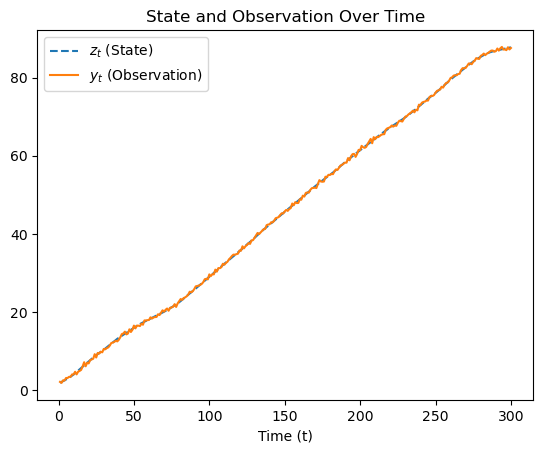

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
N = 2  # Dimension of state vector x_t
M = 1  # Dimension of observation vector y_t
sigma_W = 0.5
delta_t = 0.1  # Time interval between measurements

# System matrix
A = np.array([[1, delta_t], [0, 1]])
C_v = sigma_W**2 * np.array([[delta_t**3/3, delta_t**2/2], [delta_t**2/2, delta_t]])  # Process noise covariance

# Observation matrix
B = np.zeros(N)
B[0] = 1  # We observe only the first state component

# Initial state mean and covariance
C_0 = 0.1 * np.eye(N)  # Initial covariance of state
mu_0 = 2 * np.ones(N)  # Initial mean of state

# Measurement noise variance
C_w = 0.1  # Measurement noise variance

# Number of time steps
T = 300

# Initialize state and observation vectors
x = np.zeros((N, T+1))  # State vector
y = np.zeros(T+1)  # Observation vector

# Initialize x(0)
x[:, 0] = np.random.multivariate_normal(mu_0, C_0)

# Simulate the system over time
for t in range(T):
    # State update: x(t+1) = A * x(t) + noise
    x[:, t+1] = A @ x[:, t] + np.random.multivariate_normal(np.zeros(N), C_v)
    
    # Observation update: y(t+1) = B * x(t+1) + noise
    y[t+1] = B @ x[:, t+1] + np.random.normal(0, np.sqrt(C_w))

# Time vector for plotting
time_ax = np.arange(1, T+1)

# Plot the results: state and observation
plt.plot(time_ax, x[0, 1:], '--', label=r'$z_t$ (State)')
plt.plot(time_ax, y[1:], label=r'$y_t$ (Observation)')
plt.xlabel('Time (t)')
plt.legend()
plt.title('State and Observation Over Time')
plt.show()


## Summary
An SDE is a differential equation that described the evolution of a system over time, where the dynamics include a stochastic (random) component. It is typically used to model systems that are influenced by random processed, such as financial markets and biological processes. We can discretise continous-state space models without having to make approximations, and use this for simulations, as shows for the CV model above.